# CC7182NI - Programming for Data Analytics

### **100% Individual Coursework**

##### **Student Name:** Pravash Karki 
##### **London Met ID:** 11071480
##### **College ID: NP01MS7S210070**


---
## Part 1. Analysis of a Student Performance Dataset


## 1. Data Understanding

The coursework for this module includes two data sets—student achievement data from two Portuguese secondary schools, Gabriel Pereira and Mousinho da Silveira.

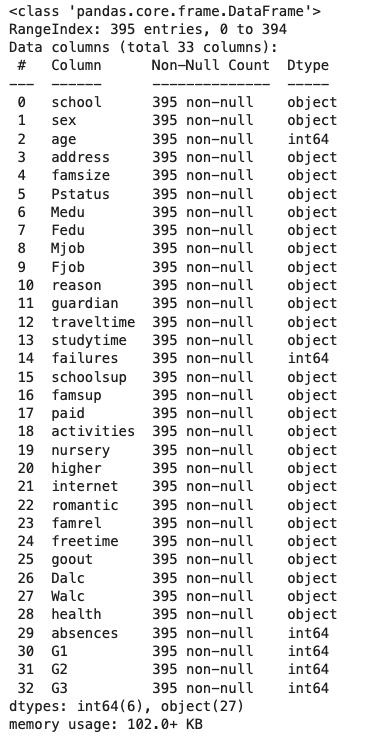

## 2. Data Transformation
### Import Packages

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
# Making dataframe
student_csv_url = 'Dataset/Part 1/student.csv'
df = pd.read_csv(student_csv_url)

In [207]:
# Full summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [208]:
df.shape

(395, 33)

In [209]:
df.describe()

,age,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [210]:
"""
.describe() only analyzes numeric columns by default,
but we can provide other data types by using include parameter
"""
df.describe(include=object)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,5,5,4,...,2,2,2,2,5,5,5,5,5,5
top,GP,F,U,GT3,T,higher education,5th to 9th grade,other,other,course,...,yes,yes,yes,no,very good,medium,medium,very low,very low,excellent
freq,349,208,307,281,354,131,115,141,217,145,...,314,375,329,263,195,157,130,276,151,146


In [211]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher education,higher education,at_home,teacher,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,excellent,medium,medium,very low,very low,good,4,5,5,6
2,GP,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,very good,medium,low,low,medium,good,10,7,8,10
3,GP,F,15,U,GT3,T,higher education,5th to 9th grade,health,services,...,good,low,low,very low,very low,excellent,2,15,14,15
4,GP,F,16,U,GT3,T,secondary education,secondary education,other,other,...,very good,medium,low,very low,low,excellent,4,6,10,10


In [212]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,5th to 9th grade,5th to 9th grade,services,services,...,excellent,very high,high,high,very high,very good,11,9,9,9
391,MS,M,17,U,LE3,T,secondary education,primary education (4th grade),services,services,...,bad,high,very high,medium,high,bad,3,14,16,16
392,MS,M,21,R,GT3,T,primary education (4th grade),primary education (4th grade),other,other,...,excellent,very high,medium,medium,medium,good,3,10,8,7
393,MS,M,18,R,LE3,T,secondary education,5th to 9th grade,services,other,...,very good,high,very low,medium,high,excellent,0,11,12,10
394,MS,M,19,U,LE3,T,primary education (4th grade),primary education (4th grade),other,at_home,...,good,low,medium,medium,medium,excellent,5,8,9,9


In [213]:
"""
Create Functions
Concat (joins) original column and column with replaced value
"""
def concat_cols(dataframe, column, new_column):
    return pd.concat((
        dataframe[column],
        new_column.rename(f'new_{column}')),
        axis=1
    )

# Returns array of unique values in any column
def unique_cols(unique_column):
    return unique_column.unique()

#### Transform Variable ‘school’

In [214]:
col = df["school"]
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

replace_vals = col.replace(data, vals)  # Replace Values
new_col_school = concat_cols(df, 'school', replace_vals)  # Create new column
new_col_school.apply(unique_cols)  # Unique values in column

,school,new_school
0,GP,0
1,MS,1


#### Transform Variable ‘sex’

In [215]:
# Understand unique value of column sex
df.sex.unique()

array(['F', 'M'], dtype=object)

In [216]:
col = df.sex
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_sex = concat_cols(df, 'sex', replace_vals)

# Unique values in column
new_col_sex.apply(unique_cols)

,sex,new_sex
0,F,0
1,M,1


#### Transform Variable ‘address’

In [217]:
# Understand unique value of column address
df.address.unique()

array(['U', 'R'], dtype=object)

In [218]:
col = df.address
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_address = concat_cols(df, 'address', replace_vals)

# Unique values in column
new_col_address.apply(unique_cols)

,address,new_address
0,U,0
1,R,1


#### Transform Variable ‘famsize’

In [219]:
# Understand unique value of column famsize
df.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

In [220]:
col = df.famsize
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_famsize = concat_cols(df, 'famsize', replace_vals)

# Unique values in column
new_col_famsize.apply(unique_cols)

,famsize,new_famsize
0,GT3,0
1,LE3,1


#### Transform Variable ‘Pstatus’

In [221]:
# Understand unique value of column Pstatus
df.Pstatus.unique()

array(['A', 'T'], dtype=object)

In [222]:
col = df.Pstatus
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_pstatus = concat_cols(df, 'Pstatus', replace_vals)

# Unique values in column
new_col_pstatus.apply(unique_cols)

,Pstatus,new_Pstatus
0,A,0
1,T,1


#### Transform Variable ‘schoolsup’

In [223]:
# Understand unique value of column schoolsup
df.schoolsup.unique()

array(['yes', 'no'], dtype=object)

In [224]:
col = df.schoolsup
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_schoolsup = concat_cols(df, 'schoolsup', replace_vals)

# Unique values in column
new_col_schoolsup.apply(unique_cols)

,schoolsup,new_schoolsup
0,yes,0
1,no,1


#### Transform Variable ‘famsup’

In [225]:
# Understand unique value of column famsup
df.famsup.unique()

array(['no', 'yes'], dtype=object)

In [226]:
col = df.famsup
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_famsup = concat_cols(df, 'famsup', replace_vals)

# Unique values in column
new_col_famsup.apply(unique_cols)

,famsup,new_famsup
0,no,0
1,yes,1


In [227]:
#Understand unique value of column paid
df.paid.unique()

array(['no', 'yes'], dtype=object)

In [228]:
col = df.paid
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_paid = concat_cols(df, 'paid', replace_vals)

# Unique values in column
new_col_paid.apply(unique_cols)

,paid,new_paid
0,no,0
1,yes,1


#### Transform Variable ‘activities’

In [229]:
# Understand unique value of column activities
df.activities.unique()

array(['no', 'yes'], dtype=object)

In [230]:
col = df.activities
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_activities = concat_cols(df, 'activities', replace_vals)

# Unique values in column
new_col_activities.apply(unique_cols)

,activities,new_activities
0,no,0
1,yes,1


#### Transform Variable ‘nursery’

In [231]:
# Understand unique value of column nursery
df.nursery.unique()

array(['yes', 'no'], dtype=object)

In [232]:
col = df.nursery
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_nursery = concat_cols(df, 'nursery', replace_vals)

# Unique values in column
new_col_nursery.apply(unique_cols)

,nursery,new_nursery
0,yes,0
1,no,1


#### Transform Variable ‘higher’

In [233]:
# Understand unique value of column higher
df.higher.unique()

array(['yes', 'no'], dtype=object)

In [234]:
col = df.higher
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new column
new_col_higher = concat_cols(df, 'higher', replace_vals)

# Unique values in column
new_col_higher.apply(unique_cols)

,higher,new_higher
0,yes,0
1,no,1


#### Transform Variable ‘internet’

In [235]:
# Understand unique value of column internet
col = df.internet

In [236]:
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_internet = concat_cols(df, 'internet', replace_vals)

# Unique values in column
new_col_internet.apply(unique_cols)

,internet,new_internet
0,no,0
1,yes,1


#### Transform Variable ‘romantic’

In [237]:
# Understand unique value of column romantic
df.romantic.unique()

array(['no', 'yes'], dtype=object)

In [238]:
col = df.romantic
data = col.unique()  # Unique Value
vals = (0, 1)  # Binary Value

# Replace Values
replace_vals = col.replace(data, vals)

# Create new coloumn
new_col_romantic = concat_cols(df, 'romantic', replace_vals)

# Unique values in column
new_col_romantic.apply(unique_cols)

,romantic,new_romantic
0,no,0
1,yes,1


## 2.b Transform Variables - Ordinal numbers

Understanding the unique value and converting Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, famrel, freetime, gout, Dalc, Walc and health into ordinal numbers based on number of cases in the data set by creating new columns without overwriting the existing ones.

#### Transform Variable ‘Medu’

In [239]:
# Understand unique value of column Medu
df.Medu.unique()

array(['higher education', 'primary education (4th grade)',
       'secondary education', '5th to 9th grade', 'none'], dtype=object)

In [240]:
col = df.Medu  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_medu = concat_cols(df, 'Medu', replace_vals)

# Unique values in columns
new_col_medu.apply(unique_cols)

,Medu,new_Medu
0,higher education,0
1,primary education (4th grade),1
2,secondary education,2
3,5th to 9th grade,3
4,none,4


#### Transform Variable ‘Fedu’

In [241]:
# Understand unique value of column Fedu
df.Fedu.unique()

array(['higher education', 'primary education (4th grade)',
       '5th to 9th grade', 'secondary education', 'none'], dtype=object)

In [242]:
col = df.Fedu  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_fedu = concat_cols(df, 'Fedu', replace_vals)

# Unique values in columns
new_col_fedu.apply(unique_cols)

,Fedu,new_Fedu
0,higher education,0
1,primary education (4th grade),1
2,5th to 9th grade,2
3,secondary education,3
4,none,4


#### Transform Variable ‘Mjob’

In [243]:
# Understand unique value of column Mjob
df.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [244]:
col = df.Mjob  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_mjob = concat_cols(df, 'Mjob', replace_vals)

# Unique values in columns
new_col_mjob.apply(unique_cols)

,Mjob,new_Mjob
0,at_home,0
1,health,1
2,other,2
3,services,3
4,teacher,4


#### Transform Variable ‘Fjob’

In [245]:
# Understand unique value of column Fjob
df.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [246]:
col = df.Fjob  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_fjob = concat_cols(df, 'Fjob', replace_vals)

# Unique values in columns
new_col_fjob.apply(unique_cols)

,Fjob,new_Fjob
0,teacher,0
1,other,1
2,services,2
3,health,3
4,at_home,4


#### Transform Variable ‘reason’

In [247]:
# Understand unique value of column reason
df.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [248]:
col = df.reason  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_reason = concat_cols(df, 'reason', replace_vals)

# Unique values in columns
new_col_reason.apply(unique_cols)

,reason,new_reason
0,course,0
1,other,1
2,home,2
3,reputation,3


#### Transform Variable ‘guardian’

In [249]:
# Understand unique value of column guardian
df.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

In [250]:
col = df.guardian  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_guardian = concat_cols(df, 'guardian', replace_vals)

# Unique values in columns
new_col_guardian.apply(unique_cols)

,guardian,new_guardian
0,mother,0
1,father,1
2,other,2


#### Transform Variable ‘traveltime’

In [251]:
# Understand unique value of column traveltime
df.traveltime.unique()

array(['15 to 30 min.', '<15 min.', '30 min. to 1 hour', '>1 hour'],
      dtype=object)

In [252]:
col = df.traveltime  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_traveltime = concat_cols(df, 'traveltime', replace_vals)

# Unique values in columns
new_col_traveltime.apply(unique_cols)

,traveltime,new_traveltime
0,15 to 30 min.,0
1,<15 min.,1
2,30 min. to 1 hour,2
3,>1 hour,3


#### Transform Variable ‘studytime’

In [253]:
# Understand unique value of column studytime
df.studytime.unique()

array(['2 to 5 hours', '5 to 10 hours', '<2 hours', '>10 hours'],
      dtype=object)

In [254]:
col = df.studytime  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_studytime = concat_cols(df, 'studytime', replace_vals)

# Unique values in columns
new_col_studytime.apply(unique_cols)

,studytime,new_studytime
0,2 to 5 hours,0
1,5 to 10 hours,1
2,<2 hours,2
3,>10 hours,3


#### Transform Variable ‘famrel’

In [255]:
# Understand unique value of column famrel
df.famrel.unique()

array(['very good', 'excellent', 'good', 'very bad', 'bad'], dtype=object)

In [256]:
col = df.famrel  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_famrel = concat_cols(df, 'famrel', replace_vals)

# Unique values in columns
new_col_famrel.apply(unique_cols)

,famrel,new_famrel
0,very good,0
1,excellent,1
2,good,2
3,very bad,3
4,bad,4


#### Transform Variable ‘freetime’

In [257]:
#Understand unique value of column freetime
df.freetime.unique()

array(['medium', 'low', 'high', 'very low', 'very high'], dtype=object)

In [258]:
col = df.freetime  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_freetime = concat_cols(df, 'freetime', replace_vals)

# Unique values in columns
new_col_freetime.apply(unique_cols)

,freetime,new_freetime
0,medium,0
1,low,1
2,high,2
3,very low,3
4,very high,4


#### Transform Variable ‘goout’

In [259]:
# Understand unique value of column gout
df.goout.unique()

array(['high', 'medium', 'low', 'very low', 'very high'], dtype=object)

In [260]:
col = df.goout  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_goout = concat_cols(df, 'goout', replace_vals)

# Unique values in columns
new_col_goout.apply(unique_cols)

,goout,new_goout
0,high,0
1,medium,1
2,low,2
3,very low,3
4,very high,4


#### Transform Variable ‘Dalc’

In [261]:
# Understand unique value of column Dalc
df.Dalc.unique()

array(['very low', 'low', 'very high', 'medium', 'high'], dtype=object)

In [262]:
col = df.Dalc  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_dalc = concat_cols(df, 'Dalc', replace_vals)

# Unique values in columns
new_col_dalc.apply(unique_cols)

,Dalc,new_Dalc
0,very low,0
1,low,1
2,very high,2
3,medium,3
4,high,4


#### Transform Variable ‘Walc’

In [263]:
# Understand unique value of column Walc
df.Walc.unique()

array(['very low', 'medium', 'low', 'high', 'very high'], dtype=object)

In [264]:
col = df.Walc  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_wcal = concat_cols(df, 'Walc', replace_vals)

# Unique values in columns
new_col_wcal.apply(unique_cols)

,Walc,new_Walc
0,very low,0
1,medium,1
2,low,2
3,high,3
4,very high,4


#### Transform Variable ‘health’

In [265]:
# Understand unique value of column health
df.health.unique()

array(['good', 'excellent', 'very bad', 'bad', 'very good'], dtype=object)

In [266]:
col = df.health  # Dataframe column
data = col.unique()  # Unique Value
data = tuple(data)  # Tuple of unique value
vals = tuple(range(0, len(data)))  #Tuple of ordinal number based on data

replace_vals = col.replace(data, vals)  # Transform to ordinal numbers

# Create new ordinal number column
new_col_health = concat_cols(df, 'health', replace_vals)

# Unique values in columns
new_col_health.apply(unique_cols)

,health,new_health
0,good,0
1,excellent,1
2,very bad,2
3,bad,3
4,very good,4


---

## 2.c Create a New Column - age_category

Values should be based on the values in the age column, divide the values into 3 ordinal numbers; 1 – 15 to 17, 2 – 18 to 20, 3 – 21 and over

In [267]:
# Understand unique value of column age
df.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [268]:
# Creating function which categorize data according to age.

def transform_age(age):
    if age >= 21:
        return 3
    elif age >= 18:
        return 2
    elif age >= 15:
        return 1

In [269]:
# Applying the transformed value based on the value of age

df['age_category'] = df['age'].apply(transform_age)
# transform_age function is used to convert the age in ordinal numbers

df[['age', 'age_category']]

,age,age_category
0,18,2
1,17,1
2,15,1
3,15,1
4,16,1
...,...,...
390,20,2
391,17,1
392,21,3
393,18,2


--- 
## 2.d Create a New Column -  passed (yes or no)

Create a new column named passed (yes or no) whose values should be based on the values present in the G3 column (>=8 – yes, <8 – no)


In [270]:
# Understand unique value of column G3
df.G3.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4])

In [271]:
# Creating function which categorize data according to G3.

def category(g3):
    if g3 >= 8:
        return "yes"
    elif g3 < 8:
        return "no"


# Applying the transformed value based on the value of G3
df["passed"] = df["G3"].apply(category)

In [272]:
# G3 Value 
df[["G3", "passed"]]

,G3,passed
0,6,no
1,6,no
2,10,yes
3,15,yes
4,10,yes
...,...,...
390,9,yes
391,16,yes
392,7,no
393,10,yes


## 3. Initial Data Analysis

### 3.1 Summary Statistics

Write code to show the summary statistics (sum, mean, median, standard deviation, max and min) of the variables age, absences, G1, G2 and G3.

In [273]:
df[["age", "absences", "G1", "G2", "G3"]].describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


In [274]:
# Create function to show summary statistics.
def calculate_describe(stats_column, stats_keyword):
    col_sum = stats_column.sum()  # Sum
    col_mean = stats_column.mean()  # Mean
    col_median = stats_column.median()  # Median
    col_std = stats_column.std()  # Standard deviation
    col_max = stats_column.max()  # Max
    col_min = stats_column.min()  # Min

    print(f"Total sum of {stats_keyword} is: {col_sum}")
    print(f"Mean of {stats_keyword} is: {col_mean}")
    print(f"Median of {stats_keyword} is: {col_median}")
    print(f"Standard deviation of {stats_keyword}: {col_std}")
    print(f"Maximum value of {stats_keyword} is: {col_max}")
    print(f"Minimum value of {stats_keyword} is: {col_min}")

#### Summary statistics of variable 'age'

In [275]:
col = df.age  # Dataframe
keyword = 'age'  # Keyword used on print

calculate_describe(col, keyword)  # Printing Summary

Total sum of age is: 6595
Mean of age is: 16.696202531645568
Median of age is: 17.0
Standard deviation of age: 1.2760427246056245
Maximum value of age is: 22
Minimum value of age is: 15


#### Summary statistics of variable 'absences'

In [276]:
col = df.absences  # Dataframe
keyword = 'absences'  # Keyword used on print

calculate_describe(col, keyword)  # Printing Summary

Total sum of absences is: 2255
Mean of absences is: 5.708860759493671
Median of absences is: 4.0
Standard deviation of absences: 8.003095687108177
Maximum value of absences is: 75
Minimum value of absences is: 0


#### Summary statistics of variable 'G1'

In [277]:
col = df.G1  # Dataframe
keyword = 'G1'  # Keyword used on print

calculate_describe(col, keyword)  # Printing Summary

Total sum of G1 is: 4309
Mean of G1 is: 10.90886075949367
Median of G1 is: 11.0
Standard deviation of G1: 3.3191946715076686
Maximum value of G1 is: 19
Minimum value of G1 is: 3


#### Summary statistics of variable 'G2'

In [278]:
col = df.G2  # Dataframe
keyword = 'G2'  # Keyword used on print

calculate_describe(col, keyword)  # Printing Summary

Total sum of G2 is: 4232
Mean of G2 is: 10.713924050632912
Median of G2 is: 11.0
Standard deviation of G2: 3.761504659556034
Maximum value of G2 is: 19
Minimum value of G2 is: 0


#### Summary statistics of variable 'G3'

In [279]:
col = df.G3  # Dataframe
keyword = 'G3'  # Keyword used on print

calculate_describe(col, keyword)  # Printing Summary

Total sum of G3 is: 4114
Mean of G3 is: 10.415189873417722
Median of G3 is: 11.0
Standard deviation of G3: 4.5814426109978434
Maximum value of G3 is: 20
Minimum value of G3 is: 0


### 3.2 Caluclation and Correlation Between Variables
Variables absences, failures, G1, G2 and G3. Presenting the result using a heatmap and interpretation of the results.

In [280]:
# Create the correlation matrix
d = df[['absences', 'failures', 'G1', 'G2', 'G3']]
corr = d.corr()

corr  # Printing Data

,absences,failures,G1,G2,G3
absences,1.000000,0.063726,-0.031003,-0.031777,0.034247
failures,0.063726,1.000000,-0.354718,-0.355896,-0.360415
G1,-0.031003,-0.354718,1.000000,0.852118,0.801468
G2,-0.031777,-0.355896,0.852118,1.000000,0.904868
G3,0.034247,-0.360415,0.801468,0.904868,1.000000


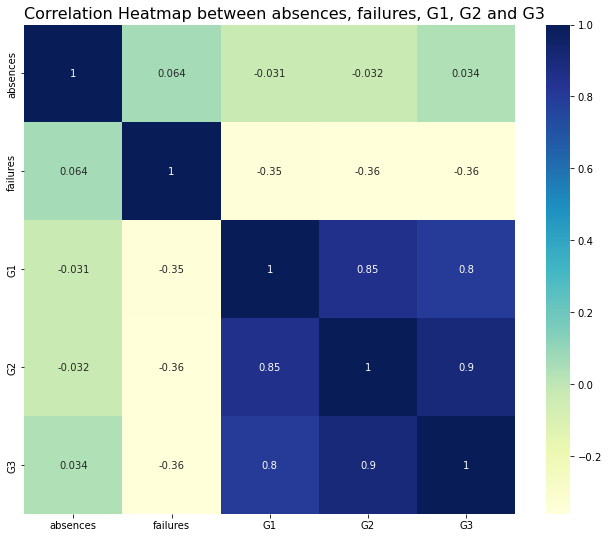

In [281]:
# Set up the matplotlib figure
figsize = plt.figure(figsize=(11, 9))

heatmap = sns.heatmap(
    corr,  # The data to plot
    cmap="YlGnBu",
    annot=True
)

heatmap.set_title('Correlation Heatmap between absences, failures, G1, G2 and G3', fontsize=16,
                  loc='left')  # Title with font size

plt.show()  # Display a figure

## 4. Data Exploration and Visualization

### 4.1 Histogram Plots and Boxplots
Histogram plots and boxplots to visualize the distribution of the variables age, absences and G3. Interpretation of the results and comment about the distribution of each variable.

#### 4.1.a Histogram plot for 'age'

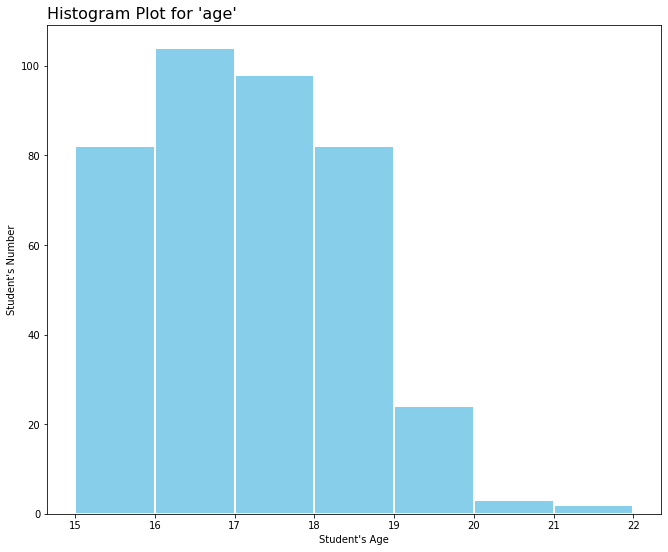

In [282]:
# Set up the histogram figure size
plt.figure(figsize=(11, 9))

start = df['age'].unique().min()  # Minimum Age
stop = df['age'].unique().max() + 1  # Maximum Age +1 is list highest.

ages_list = [i for i in range(start, stop)]

plt.hist(
    df['age'],
    edgecolor="white",
    linewidth=2,
    color='skyblue',
    bins=ages_list
)

plt.xticks(ages_list)

# Title of Histogram
plt.title("Histogram Plot for 'age'", fontsize=16, loc='left')

# X Label
plt.xlabel("Student's Age")

# Y Label
plt.ylabel("Student's Number")

plt.show()  # Display a figure

#### 4.1.b Box plot for 'age'

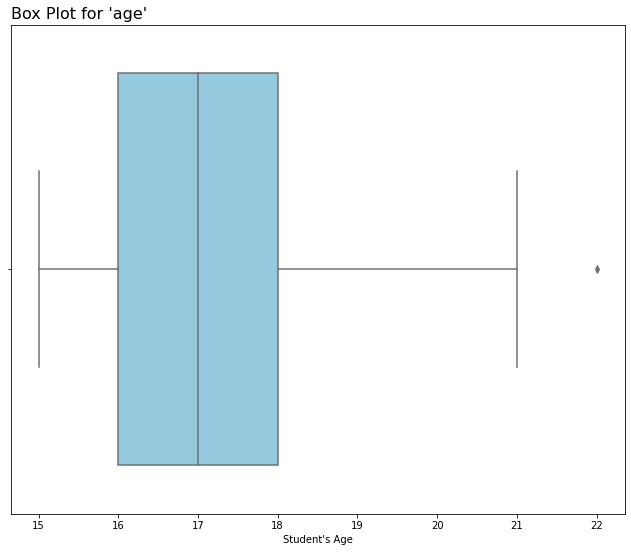

In [283]:
# Set up the box plot figure
plt.figure(figsize=(11, 9))

sns.boxplot(x=df["age"], color='skyblue')

# Title 
plt.title("Box Plot for 'age'", fontsize=16, loc='left')

# X Label
plt.xlabel("Student's Age")

plt.show()  # Display a figure

#### 4.1.c Histogram plot for ‘absences’

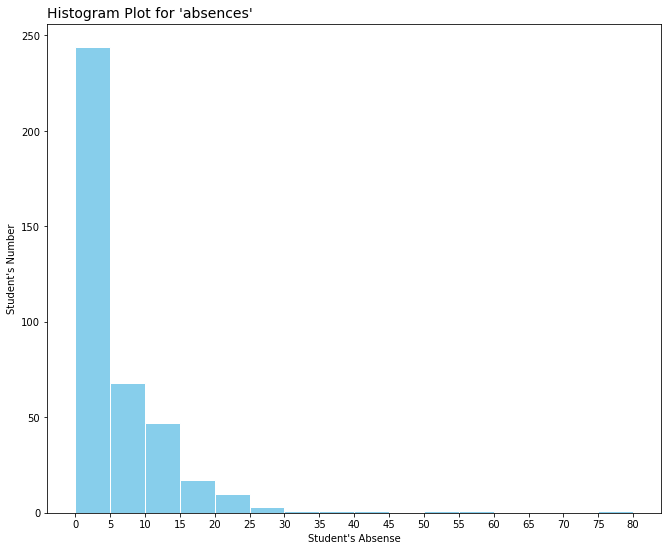

In [284]:
# Set up the histogram figure 
plt.figure(figsize=(11, 9))

start = df['absences'].unique().min()
stop = df['absences'].unique().max() + 10

absences_list = [i for i in range(start, stop, 5)]

plt.hist(
    df['absences'],
    edgecolor="white",
    linewidth=1,
    color='skyblue',
    bins=absences_list
)

plt.xticks(absences_list)

# Title of Histogram
plt.title("Histogram Plot for 'absences'", fontsize=14, loc='left')

# X Label
plt.xlabel("Student's Absense")

# Y Label
plt.ylabel("Student's Number")

plt.show()  # Display a figure

#### 4.1.d Box plot for ‘absences’

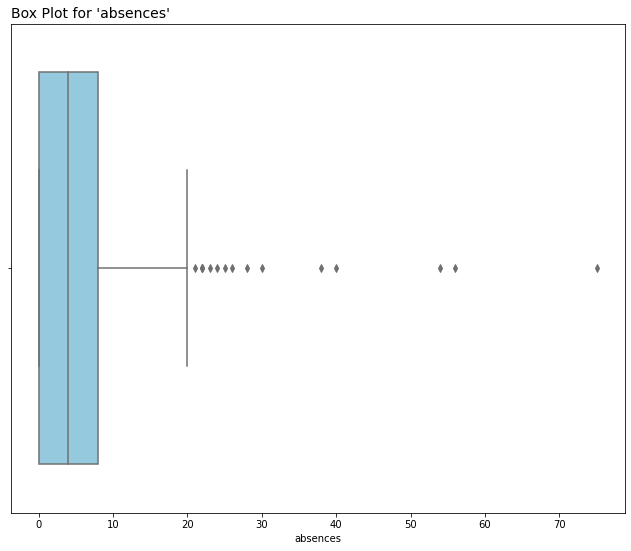

In [285]:
# Set up the histogram figure 
plt.figure(figsize=(11, 9))

# Title
plt.title(
    "Box Plot for 'absences'",
    fontsize=14,
    loc="left"
)

sns.boxplot(
    x=df["absences"],
    color="skyblue"
)  # Box Plot

plt.show()  # Display a figure

#### 4.1.d Histogram plot for ‘G3

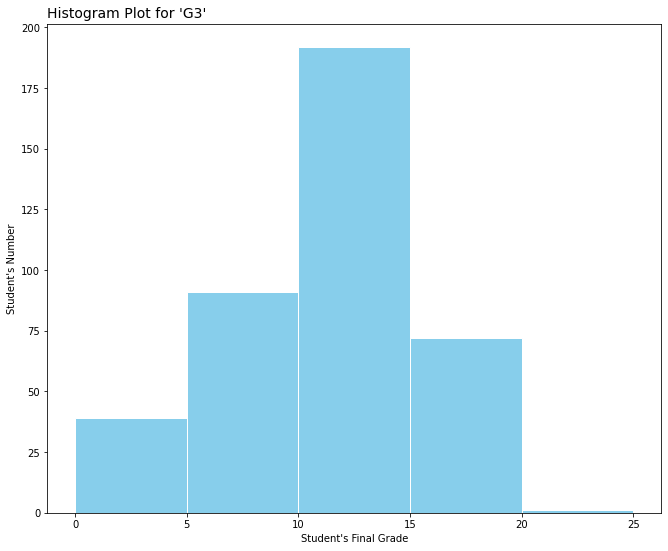

In [286]:
# Set up the histogram figure 
plt.figure(figsize=(11, 9))

start = df['G3'].unique().min()
stop = df['G3'].unique().max() + 10

absences_list = [i for i in range(start, stop, 5)]

plt.hist(
    df['G3'],
    edgecolor="white",
    linewidth=1,
    color='skyblue',
    bins=absences_list
)

plt.xticks(absences_list)

# Title of Histogram
plt.title("Histogram Plot for 'G3'", fontsize=14, loc='left')

# X Label
plt.xlabel("Student's Final Grade")

# Y Label
plt.ylabel("Student's Number")

plt.show()  # Display a figure

#### 4.1.d Box plot for ‘G3'

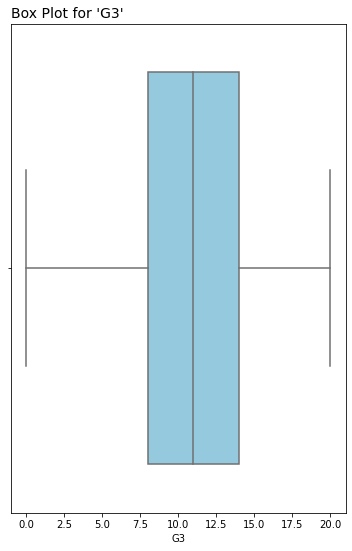

In [287]:
# Set up the histogram figure 
plt.figure(figsize=(6, 9))

plt.title("Box Plot for 'G3'", fontsize=14, loc='left')  # Title

sns.boxplot(x=df["G3"], color='skyblue')  # Box Plot

plt.show()  # Display a figure

### 4.2 Bar Graph of Passed Students Grouped by School Name 

Total students passed the final term grouped according to the school.

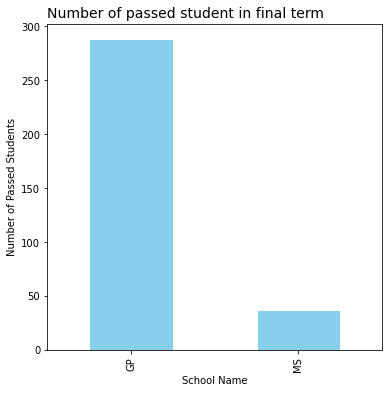

In [288]:
plt.figure(figsize=(6, 6))  # Define figure size

df[df['passed'] == 'yes'].groupby('school')['G3'].count().plot(kind="bar", edgecolor="white", color="skyblue")

# Title
plt.title("Number of passed student in final term", fontsize=14, loc='left')

plt.xlabel("School Name")  # X label

plt.ylabel("Number of Passed Students")  # Y label

plt.show()  # Display a figure

### 4.3 Bar Graph of Failed Students Based on Weekly Study Time
Total number of students who failed the final term grouped according to their weekly study time.

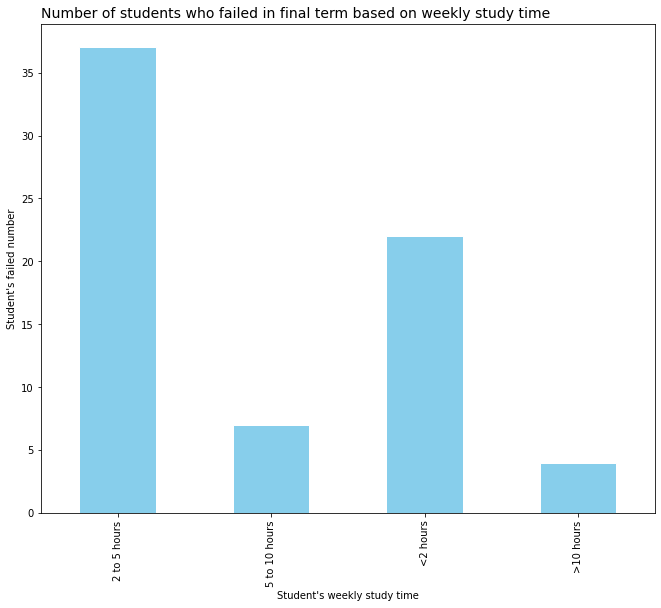

In [289]:
plt.figure(figsize=(11, 9))  # Define figure size

df[df['passed'] == 'no'].groupby('studytime')['G3'].count().plot(kind="bar", edgecolor="white", color="skyblue")

# Title
plt.title("Number of students who failed in final term based on weekly study time", fontsize=14, loc='left')

plt.xlabel("Student's weekly study time")  # X label

plt.ylabel("Student's failed number")  # Y label

plt.show()  # Display a figure

## 5. Further Analysis

### 5.1 Pass and Failed Rate

#### 5.1.a Grouping values of GP and MS based on passed 

In [290]:
# Calculate total passed student based on school
tpass = df[df['passed'] == 'yes'].groupby('school')['G3'].count()
tpass

school
GP    288
MS     37
Name: G3, dtype: int64

#### 5.1.b Assigning key to school name and creating dictionary with key value pair for passed number of students

In [291]:
# Assign key to school name
df_tpass = {}
keynum = 0
for i in tpass.index:
    df_tpass[keynum] = tpass[i]
    print(i, "is", keynum)
    keynum += 1
df_tpass

GP is 0
MS is 1


{0: 288, 1: 37}

#### 5.1.c Grouping values of GP and MS based on failed

In [292]:
# Calculating total number failed student based on school 
tfail = df[df['passed'] == 'no'].groupby('school')['G3'].count()
tfail

school
GP    61
MS     9
Name: G3, dtype: int64

In [293]:
# Assign key to school name
df_tfail = {}
keynum = 0
for i in tfail.index:
    df_tfail[keynum] = tfail[i]
    print(i, "is", keynum)
    keynum += 1
df_tfail

GP is 0
MS is 1


{0: 61, 1: 9}

#### 5.1.d Pass and failed Rate in GP (Gabriel Pereira) School

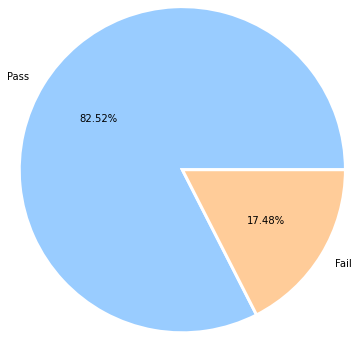

In [294]:
plt.figure(figsize=(5, 5))  # Define figure size

# Create a set of colors
colors = ['#99CCFF', '#ffcc99']

# Pie chart showing pass and fail rate of GP
plt.pie([df_tpass[0], df_tfail[0]],
        labels=["Pass", "Fail"],
        autopct="%.2f%%",
        radius=1.5,
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        colors=colors
        )

plt.show()  # Display a figure

#### 5.1.e Pass and failed Rate in MS(Mousinho da Silveira) School

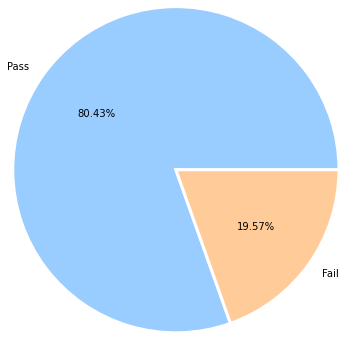

In [295]:
plt.figure(figsize=(5, 5))  # Define figure size

# Pie chart showing pass and fail rate of GP
plt.pie([df_tpass[1], df_tfail[1]],
        labels=["Pass", "Fail"],
        autopct="%.2f%%",
        radius=1.5,
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        colors=colors
        )

plt.show()  # Display a figure

### 5.2 Grade Of Students as per the Gender

#### Calculating number of passed students based on their gender

In [296]:
# Calculating total number passed student based on gender
gpass = df[df['passed'] == 'yes'].groupby('sex')['G3'].count()
gpass

sex
F    164
M    161
Name: G3, dtype: int64

#### Converting above result into array for further analysis

In [297]:
# Converts into numpy array
np.array(list(df[df['passed'] == 'yes'].groupby('sex')['G3'].count()))

# Converts into numpy array
np.array(list(df[df['passed'] == 'yes'].groupby('sex')['G3'].count().index))

array(['F', 'M'], dtype='<U1')

#### Calculating number of failed students based on their gender

In [298]:
# Calculating total number failed student based on gender
gfail = df[df['passed'] == 'no'].groupby('sex')['G3'].count()
gfail

sex
F    44
M    26
Name: G3, dtype: int64

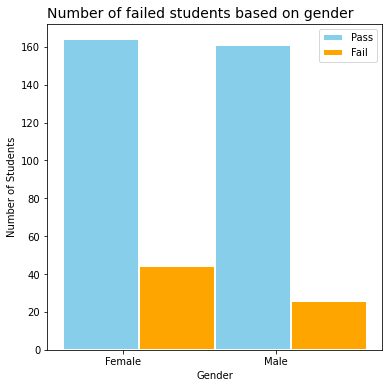

In [299]:
# Bar graph showing passed and fail number based on gender
plt.figure(figsize=(6, 6))

plt.bar(np.array(list(df[df['passed'] == 'yes'].groupby(new_col_sex['new_sex'])['G3'].count().index)),
        np.array(list(df[df['passed'] == 'yes'].groupby(new_col_sex['new_sex'])['G3'].count())), edgecolor="white",
        linewidth=2, color="skyblue", width=0.5, label="Pass")

plt.bar(np.array(list(df[df['passed'] == 'no'].groupby(new_col_sex['new_sex'])['G3'].count().index)) + 0.5,
        np.array(list(df[df['passed'] == 'no'].groupby(new_col_sex['new_sex'])['G3'].count())),
        color="orange", edgecolor="white", linewidth=2, width=0.5, label="Fail")

plt.xticks(np.array(list(df[df['passed'] == 'yes'].groupby(new_col_sex['new_sex'])['G3'].count().index)) + 0.15,
           ["Female", "Male"])

# Title
plt.title("Number of failed students based on gender ", fontsize=14, loc='left')

plt.xlabel("Gender")

plt.ylabel("Number of Students")

plt.legend()

plt.show()  # Display a figure

### 5.3 Family Background Affect on Students Final Grades

#### Grade of students as per father's job

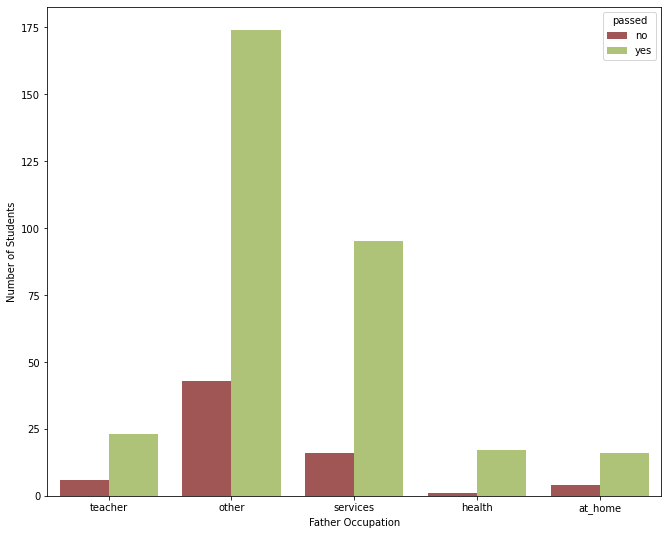

In [300]:
# Countplot showing passed and fail number based on father's occupation
plt.figure(figsize=(11, 9))

foccup = sns.countplot(
    x="Fjob",
    data=df,
    hue="passed",
    palette="tab20b_r"
)

plt.xlabel("Father Occupation")
plt.ylabel("Number of Students")
plt.show()

#### Grade of students as per mothers's job

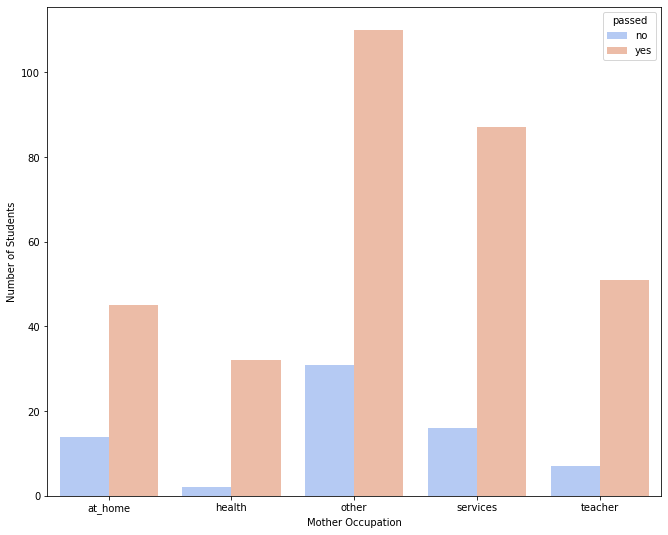

In [301]:
# Countplot showing passed and fail number based on father's occupation
plt.figure(figsize=(11, 9))

moccup = sns.countplot(
    x="Mjob",
    data=df,
    hue="passed",
    palette="coolwarm"
)

plt.xlabel("Mother Occupation")
plt.ylabel("Number of Students")
plt.show()

### 5.4 Parents Relationship Status Affect on Students Pass Rate

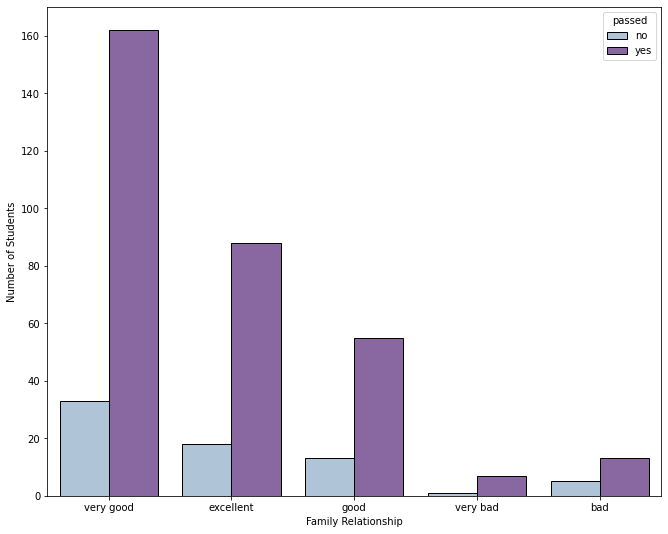

In [302]:
# Countplot showing passed and fail number based on parent's relationship status
plt.figure(figsize=(11, 9))
par_rel = sns.countplot(
    x="famrel",
    data=df,
    hue="passed",
    palette="BuPu",
    edgecolor="black"
)

par_rel.set(
    xlabel="Family Relationship",
    ylabel="Number of Students"
)

plt.show()

### 5.5 Parents Education Background Affect on Students Pass Rate

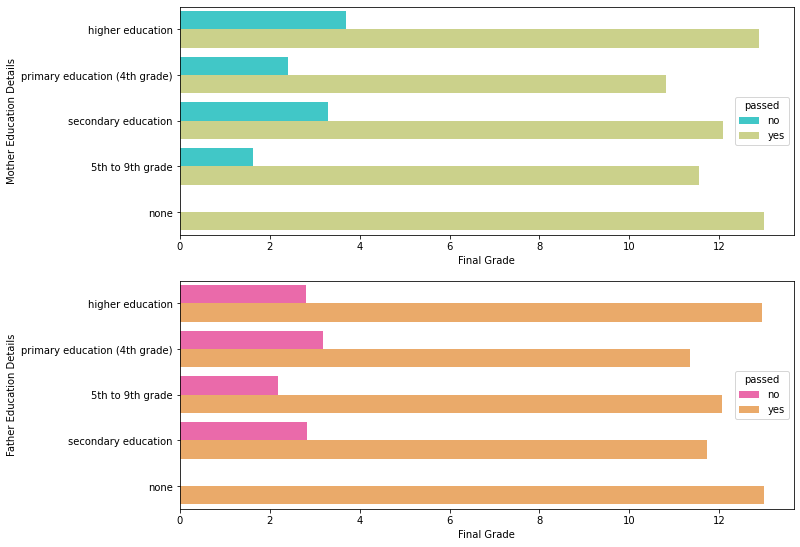

In [303]:
# Count Plot showing passed and fail number based on father's & mother's education
f, axes = plt.subplots(2, 1, figsize=(11, 9))

passgroup_one = sns.barplot(
    y="Medu",
    x="G3",
    data=df,
    hue="passed",
    ax=axes[0],
    ci=None,
    palette="rainbow"
)

passgroup_one.set(
    xlabel="Final Grade",
    ylabel="Mother Education Details"
)

passgroup_two = sns.barplot(
    y="Fedu",
    x="G3",
    data=df,
    hue="passed",
    ax=axes[1],
    ci=None,
    palette="spring"
)

passgroup_two.set(
    xlabel="Final Grade",
    ylabel="Father Education Details"
)

plt.subplots_adjust(top=0.9)
plt.show()

### 5.6 Final Grade by Frequency of Going Out

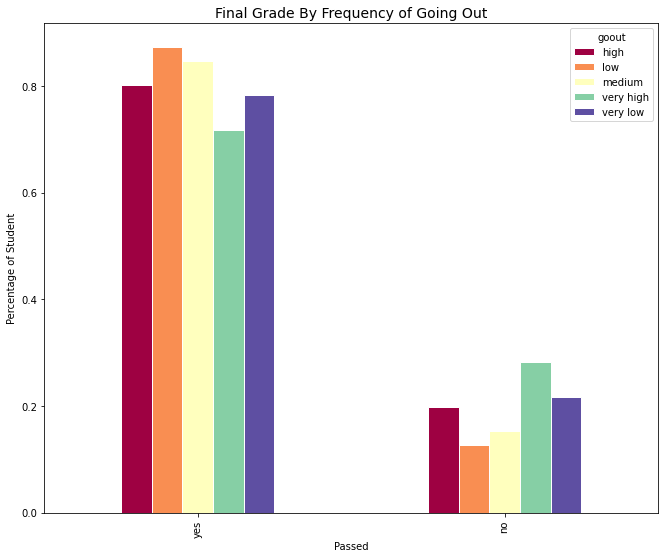

In [304]:
""" 
Bar Plot showing passed and fail number based on frequency 
students going out
"""
pct = (lambda lam_col: lam_col / lam_col.sum())
index = ['yes', 'no']
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_pct = out_tab.apply(pct).reindex(index)

out_pct.plot.bar(
    colormap="Spectral",
    figsize=(11, 9),
    edgecolor='white'
)

plt.title("Final Grade By Frequency of Going Out", fontsize=14)
plt.ylabel('Percentage of Student')
plt.xlabel('Passed')
plt.show()

### 5.7 Final Grade Affect by Travel Time

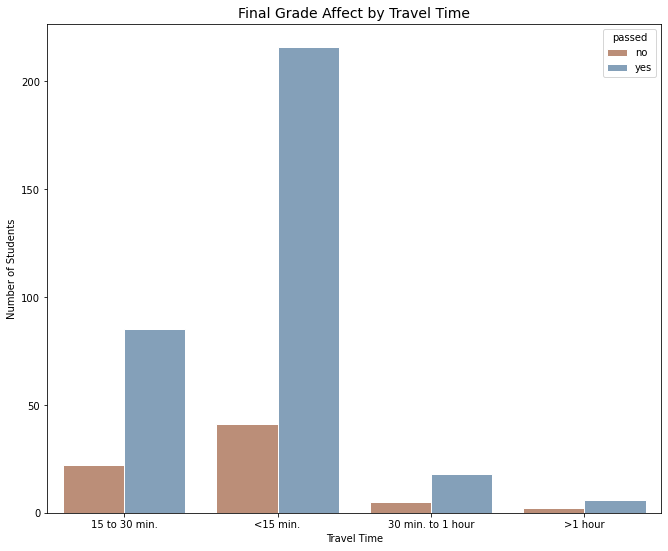

In [305]:
# Countplot showing passed and fail number based on student's traveltime
plt.figure(figsize=(11, 9))

stu_time_detail = sns.countplot(
    x="traveltime",
    data=df,
    hue="passed",
    palette="twilight_shifted_r",
    edgecolor="white"
)

stu_time_detail.set(
    xlabel="Travel Time",
    ylabel="Number of Students"
)

plt.title(
    "Final Grade Affect by Travel Time",
    fontsize=14
)

plt.show()

### 5.8 Final Grade by Romantic Status

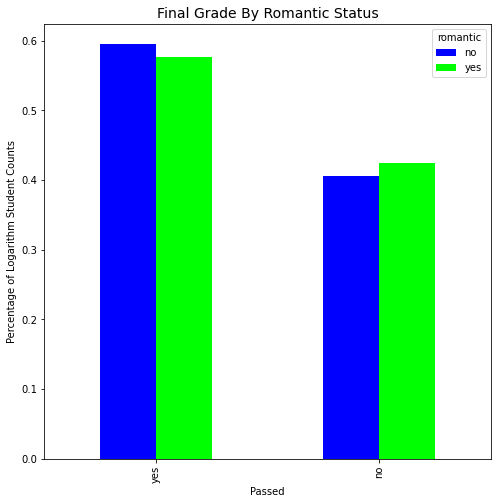

In [306]:
# Romantic status
roa_col = pd.crosstab(index=df.passed, columns=df.romantic)
roa_tab = np.log(roa_col)
roa_pct = roa_tab.apply(pct).reindex(index)

# Plot showing passed and fail number based on students romantic status.
roa_pct.plot.bar(colormap="brg", figsize=(8, 8))
plt.title('Final Grade By Romantic Status', fontsize=14)
plt.ylabel('Percentage of Logarithm Student Counts')
plt.xlabel('Passed')
plt.show()